In [ ]:
# Install the Google API Client
# !pip install --upgrade google-api-python-client


In [ ]:
# First, restart runtime after running this cell
# !pip install --upgrade numpy==1.23.5 gensim==4.3.1


In [ ]:
# !pip install transformers
# !pip install sentencepiece
# !pip install nltk
# !python -m nltk.downloader punkt
# !pip install pandas
# !pip install pyLDAvis
# !pip install sklearn
# !pip uninstall -y gensim scipy numpy
# !pip install gensim scipy numpy

In [ ]:
# Import libraries
# from googleapiclient.discovery import build
# import pandas as pd

In [1]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.3 MB/s eta 0:00:00


In [3]:
!pip install wordcloud

In [5]:
import numpy as np
import datetime as dt
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import networkx as nx

# import gensim
# from gensim.utils import simple_preprocess
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Use the code below to scrap comments from YouTube

In [ ]:
# # Replace with your API Key and YouTube Video ID
# api_key = "XXXXXXXXXXXXXXXXXXXXXXX"
# video_id = "_fpxCuorKjA"

# # Build the YouTube API client
# youtube = build('youtube', 'v3', developerKey=api_key)

# # Initialize list to store results
# box = [['Name', 'Comment', 'Time', 'Likes', 'Reply Count']]

# def scrape_comments_with_replies(video_id):
#     data = youtube.commentThreads().list(
#         part='snippet', videoId=video_id, maxResults=100, textFormat="plainText"
#     ).execute()

#     def process_comment(item):
#         name = item["snippet"]['topLevelComment']["snippet"]["authorDisplayName"]
#         comment = item["snippet"]['topLevelComment']["snippet"]["textDisplay"]
#         published_at = item["snippet"]['topLevelComment']["snippet"]['publishedAt']
#         likes = item["snippet"]['topLevelComment']["snippet"]['likeCount']
#         replies = item["snippet"]['totalReplyCount']
#         box.append([name, comment, published_at, likes, replies])
#         return item["snippet"]['topLevelComment']["id"], replies

#     def process_replies(parent_id):
#         replies_data = youtube.comments().list(
#             part='snippet', maxResults=100, parentId=parent_id, textFormat="plainText"
#         ).execute()
#         for reply in replies_data["items"]:
#             name = reply["snippet"]["authorDisplayName"]
#             comment = reply["snippet"]["textDisplay"]
#             published_at = reply["snippet"]['publishedAt']
#             likes = reply["snippet"]['likeCount']
#             box.append([name, comment, published_at, likes, ""])

#     while True:
#         for item in data["items"]:
#             parent_id, total_replies = process_comment(item)
#             if total_replies > 0:
#                 process_replies(parent_id)

#         if "nextPageToken" in data:
#             data = youtube.commentThreads().list(
#                 part='snippet', videoId=video_id, pageToken=data["nextPageToken"],
#                 maxResults=100, textFormat="plainText"
#             ).execute()
#         else:
#             break

#     df = pd.DataFrame(box[1:], columns=box[0])
#     df.to_csv("youtube-comments.csv", index=False)
#     return " Successful! Download 'youtube-comments.csv' using the link below."

# # Run the function
# print(scrape_comments_with_replies(video_id))

# Use the below code  if you want to use multiple dataset

In [ ]:
# try:
#     df1 = pd.read_csv('/content/CAT.csv')
#     df2 = pd.read_csv('/content/ETN.csv')
#     df3 = pd.read_csv('/content/GE.csv')

#     # Concatenate the dataframes
#     df = pd.concat([df1, df2, df3], ignore_index=True)

#     # Print some info about the concatenated dataframe (optional)
#     print(df.info())

# except FileNotFoundError:
#     print("One or more data files not found. Please check the filenames and paths.")
# except pd.errors.EmptyDataError:
#     print("One or more data files are empty.")
# except Exception as e:
#     print(f"An error occurred: {e}")

In [ ]:
# df.head()

# Use the code below to load a single file

In [7]:
import pandas as pd

df = pd.read_csv('Assisted_Classification.csv')

df.head(5)

,Comment,Topic
0,All companies receive incentives. CNBC's paren...,Corruption and Lobbying
1,Congress writes tax law. They will never refor...,Corruption and Lobbying
2,How much federal tax did Trump pay in 2018? Be...,Corruption and Lobbying
3,"Is called corruption sweetie, look it up",Corruption and Lobbying
4,It's telling that Amazon placed it's new HQ in...,Corruption and Lobbying


In [ ]:
#df = pd.read_csv('youtube-comments.csv', usecols=['Comment'])

#df.head(5)

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
df['Comment'].nunique()

280

In [13]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

# Perform data cleaning by removing hastags, urls, mentions, symbols, www, pictures, emoji, etc

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.express as px

In [17]:

# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """
    tweets cleaning by
    1) lowering the case of the tweet,
    2) removing unwanted symbols and replacing them with a whitespace,
    3) split sentences into words according to whitespaces and then
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string):
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string i.e. remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')

In [19]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [21]:
# removing useless content (hashtags, mentions)
df['Comment'].apply(str)

0      All companies receive incentives. CNBC's paren...
1      Congress writes tax law. They will never refor...
2      How much federal tax did Trump pay in 2018? Be...
3               Is called corruption sweetie, look it up
4      It's telling that Amazon placed it's new HQ in...
                             ...                        
297    US people: We have 28 trillion$ in debt.\nCong...
298        Welcome to the United States of corporations.
299    Worker: Flipping Burgers for minimum wage\n : ...
300    Wow, Amazon avoiding $0 federal income tax in ...
301    Wow. Switching to Geicho really does save you ...
Name: Comment, Length: 302, dtype: object

In [23]:
df['cleaned_comments'] = df['Comment'].astype(str).apply(lambda x: process_tweet(x))

In [25]:
df.head(5)

,Comment,Topic,cleaned_comments
0,All companies receive incentives. CNBC's paren...,Corruption and Lobbying,all companies receive incentives cnbc s parent...
1,Congress writes tax law. They will never refor...,Corruption and Lobbying,congress writes tax law they will never reform...
2,How much federal tax did Trump pay in 2018? Be...,Corruption and Lobbying,how much federal tax did trump pay in 2018 bet...
3,"Is called corruption sweetie, look it up",Corruption and Lobbying,is called corruption sweetie look it up
4,It's telling that Amazon placed it's new HQ in...,Corruption and Lobbying,it s telling that amazon placed it s new hq in...


# Check the number of comments or reviews in the dataset

In [27]:
df['cleaned_comments'].nunique()

277

In [29]:
#Save cleaned_comments data
df.to_csv('cleaned_comments.csv', index=False)

In [31]:
df['Comment'] = df['Comment'].str.replace('http\S+', '')


# Generate Word Frequency to analyze the most occuring word within the dataset

In [33]:
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

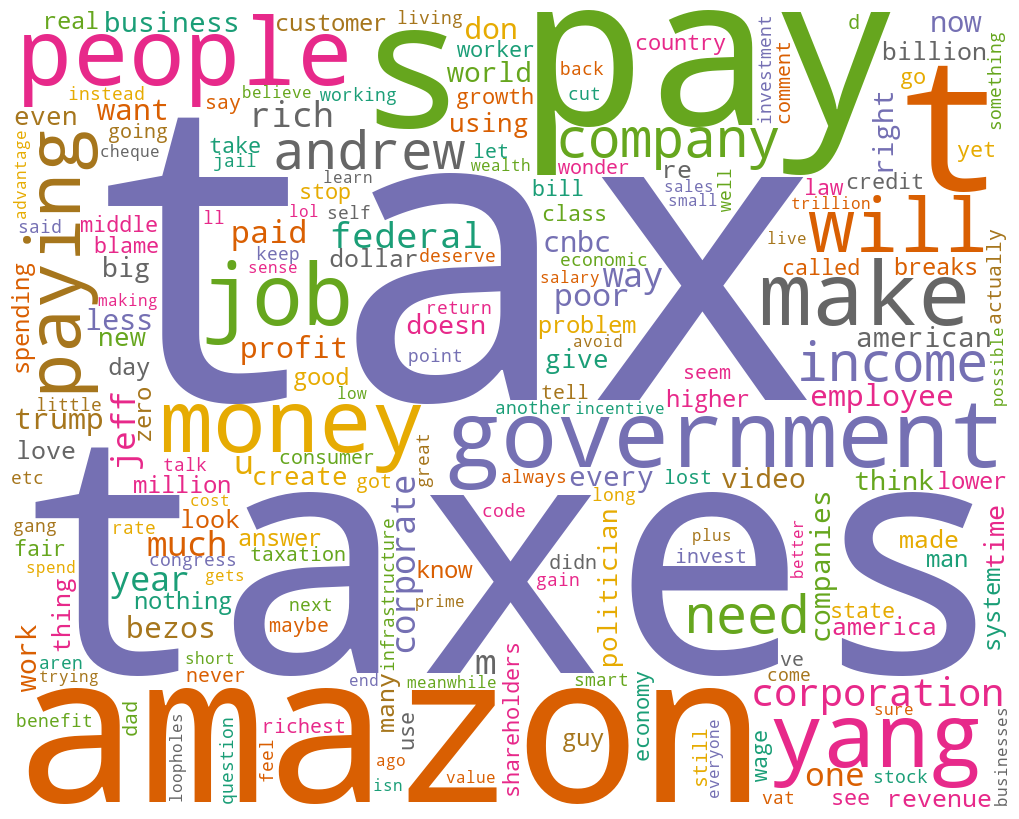

In [35]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.cleaned_comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 800,
                background_color='white', colormap='Dark2',
                collocations=False,
                stopwords = stopwords,
                min_font_size = 12).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Plot Polarity and Subjectivity Scores

In [37]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [39]:
df.dropna(subset=['cleaned_comments'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [41]:
df['Subjectivity'] = df['cleaned_comments'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_comments'].apply(getPolarity)
df.head()

,Comment,Topic,cleaned_comments,Subjectivity,Polarity
0,All companies receive incentives. CNBC's paren...,Corruption and Lobbying,all companies receive incentives cnbc s parent...,1.000000,0.600000
1,Congress writes tax law. They will never refor...,Corruption and Lobbying,congress writes tax law they will never reform...,0.312500,0.237500
2,How much federal tax did Trump pay in 2018? Be...,Corruption and Lobbying,how much federal tax did trump pay in 2018 bet...,0.300000,0.300000
3,"Is called corruption sweetie, look it up",Corruption and Lobbying,is called corruption sweetie look it up,0.000000,0.000000
4,It's telling that Amazon placed it's new HQ in...,Corruption and Lobbying,it s telling that amazon placed it s new hq in...,0.330087,0.140693


In [43]:

def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

# Plot Polarity and Subjectiviy Score in Scatter Plot

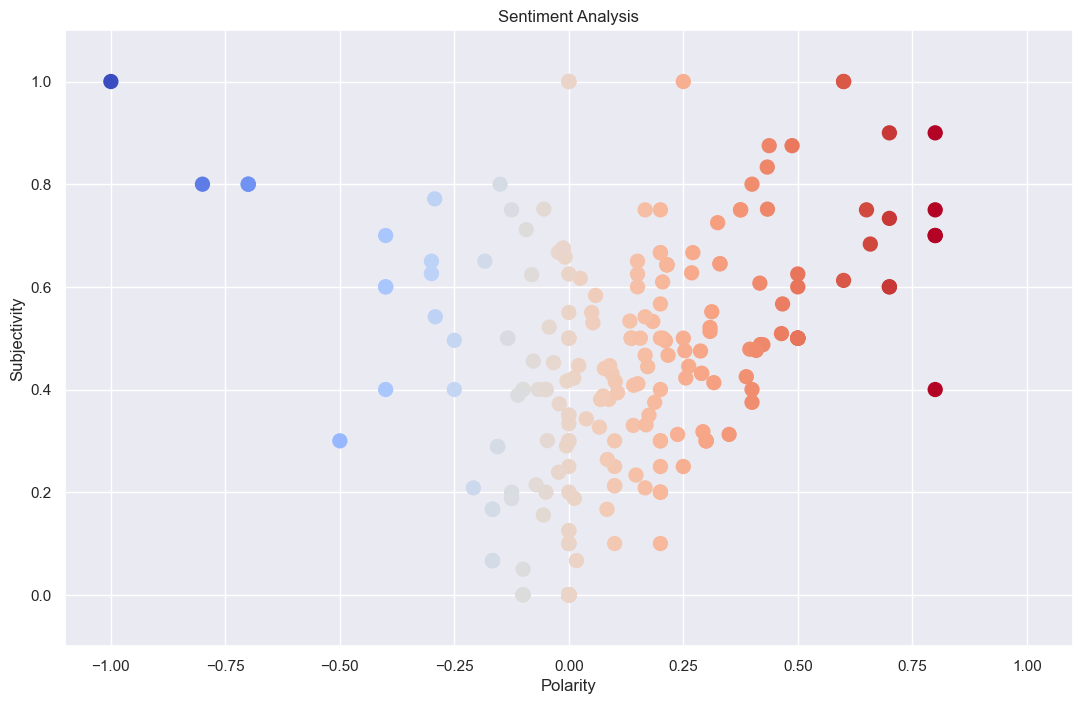

(None,)

In [218]:
#Original, but the colors transmit a different message to the audience
plt.figure(figsize=(13,8))
plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='coolwarm')
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show(),

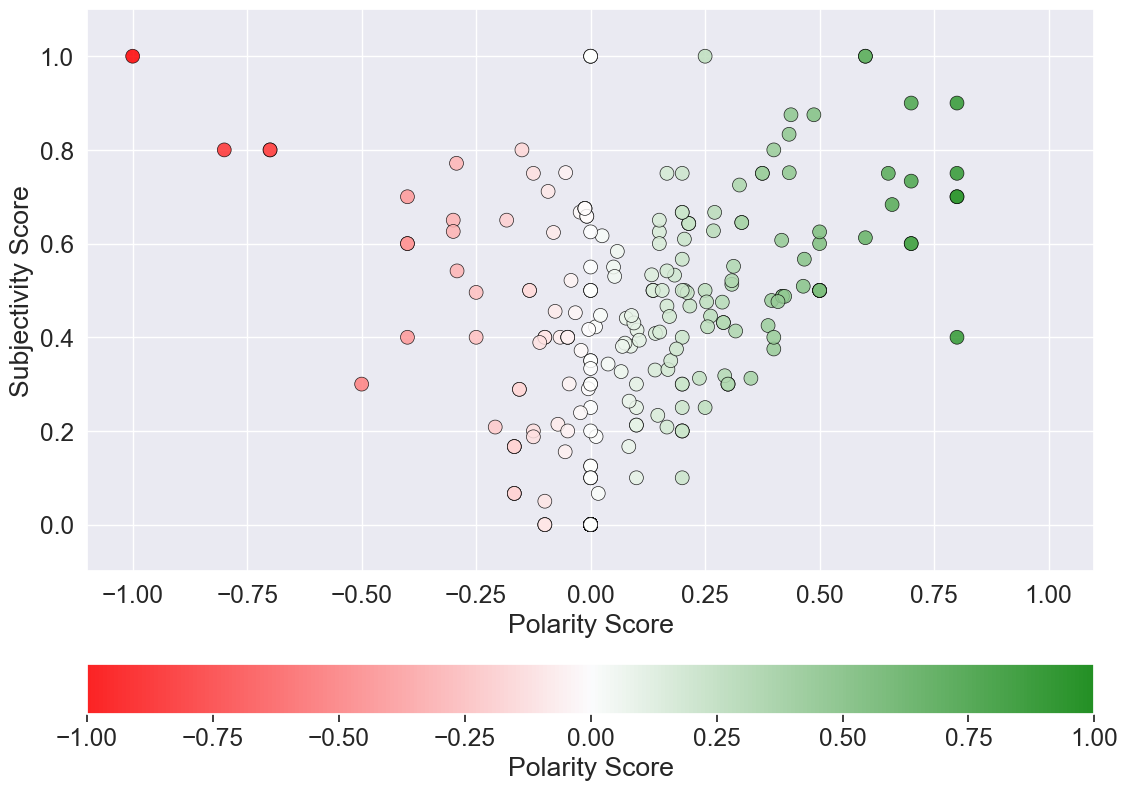

In [278]:
#Created a customize color bar to share green as positive and red as negative
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create custom Red-White-Green colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    'RedWhiteGreen', ['red', 'white', 'green'], N=256
)
# Optional: Increase font size for better readability
sns.set(font_scale=1.6)

# Normalize polarity scores for mapping
norm = plt.Normalize(vmin=-1, vmax=1)

# Plot
plt.figure(figsize=(13, 10))
scatter = plt.scatter(
    df['Polarity'],
    df['Subjectivity'],
    c=df['Polarity'],
    cmap=cmap,
    vmin=-1, vmax=1,
    s=100,
    edgecolors='black',     # Thin black border
    linewidth=0.5,          # Optional: tweak thickness
    alpha=0.85
)



# Add horizontal colorbar linked to the scatter plot
cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.12)
cbar.set_label('Polarity Score')

# Axes and labels
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
#plt.title('Sentiment Analysis')
plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.grid(True)
plt.show()

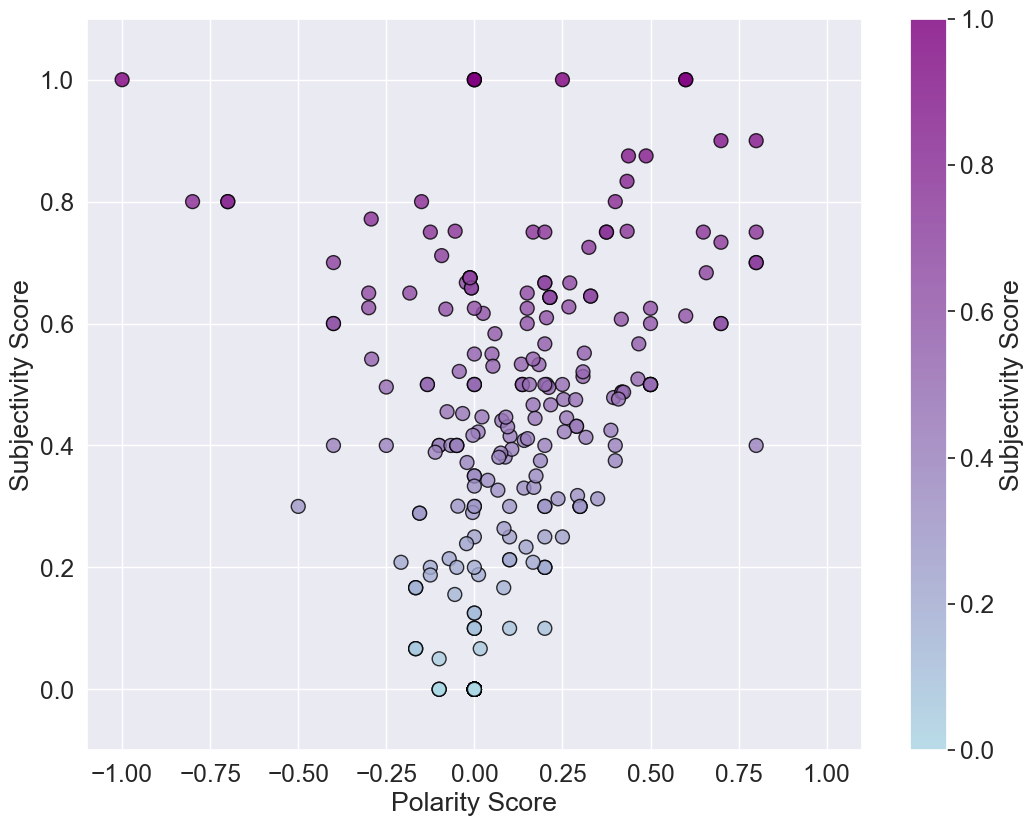

In [272]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define custom colormap: Blue (fact) → Purple (opinion)
blue_to_purple = mcolors.LinearSegmentedColormap.from_list(
    'BluePurple', ['lightblue', 'purple'], N=256
)
# Optional: Increase font size for better readability
sns.set(font_scale=1.6)
# Plot
plt.figure(figsize=(12.5, 9.5))
scatter = plt.scatter(
    df['Polarity'],
    df['Subjectivity'],
    c=df['Subjectivity'],           # Coloring by subjectivity score
    s=100,
    cmap=blue_to_purple,            # Custom colormap
    vmin=0, vmax=1,
    alpha=0.8,
    edgecolors='black'
)

# Add colorbar
plt.colorbar(scatter, label='Subjectivity Score')

# Axis labels and grid
plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True)
#plt.title('Sentiment Analysis (Subjectivity Gradient: Fact to Opinion)')
plt.show()


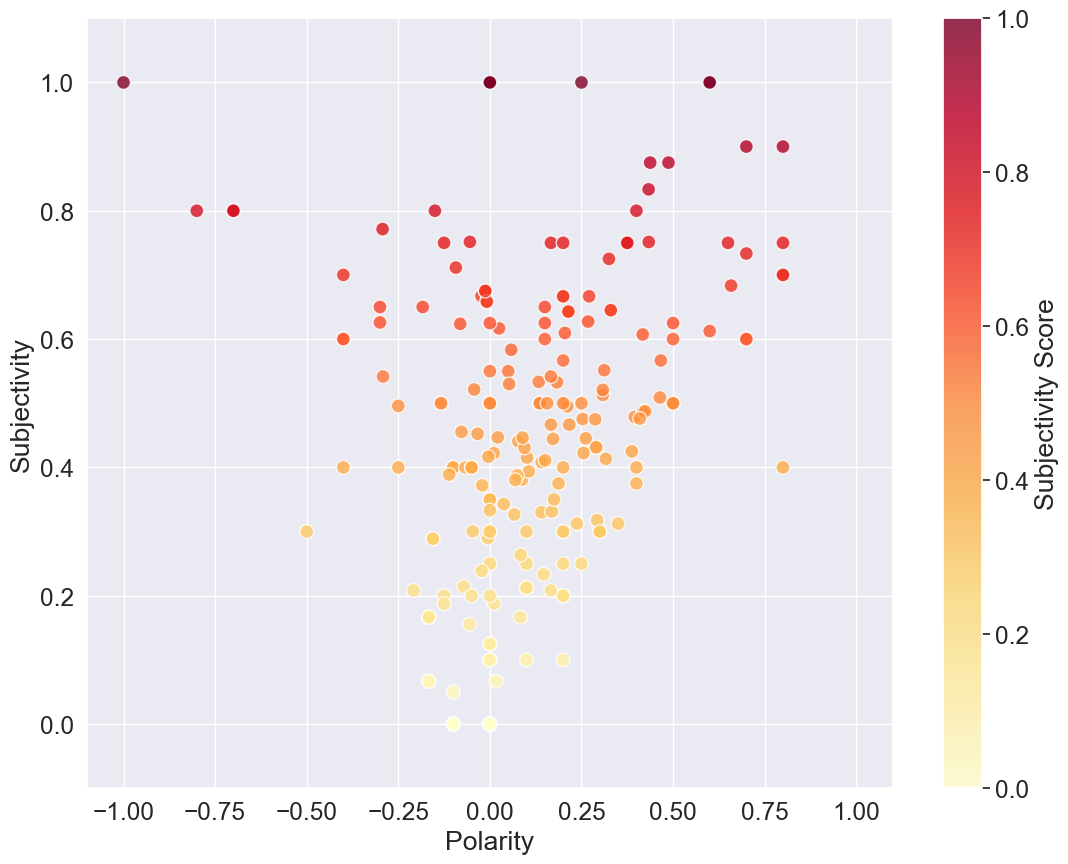

In [92]:
#Color base on Subjectivity
plt.figure(figsize=(13, 10))
scatter = plt.scatter(
    df['Polarity'],
    df['Subjectivity'],
    c=df['Subjectivity'],     # Now coloring by subjectivity
    s=100,
    cmap='YlOrRd',            # Or try 'Purples', 'Blues', 'viridis'
    vmin=0, vmax=1,           # Subjectivity range
    alpha=0.8,
    edgecolors='w'
)

plt.colorbar(scatter, label='Subjectivity Score')
#plt.title('Sentiment Analysis (Colored by Subjectivity)')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()


In [96]:
df['Sentiment'] = df.apply(lambda x: ' '.join([str(x['Analysis_Polarity']),str(x['Analysis_Subjectivity'])]),axis=1)
df.head()

,Comment,Topic,cleaned_comments,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Sentiment
0,All companies receive incentives. CNBC's paren...,Corruption and Lobbying,all companies receive incentives cnbc s parent...,1.000000,0.600000,Positive,Opinion,Positive Opinion
1,Congress writes tax law. They will never refor...,Corruption and Lobbying,congress writes tax law they will never reform...,0.312500,0.237500,Positive,Opinion,Positive Opinion
2,How much federal tax did Trump pay in 2018? Be...,Corruption and Lobbying,how much federal tax did trump pay in 2018 bet...,0.300000,0.300000,Positive,Opinion,Positive Opinion
3,"Is called corruption sweetie, look it up",Corruption and Lobbying,is called corruption sweetie look it up,0.000000,0.000000,Neutral,Fact,Neutral Fact
4,It's telling that Amazon placed it's new HQ in...,Corruption and Lobbying,it s telling that amazon placed it s new hq in...,0.330087,0.140693,Positive,Opinion,Positive Opinion


# Plot Polarity Score for the entire dataset using bar chart

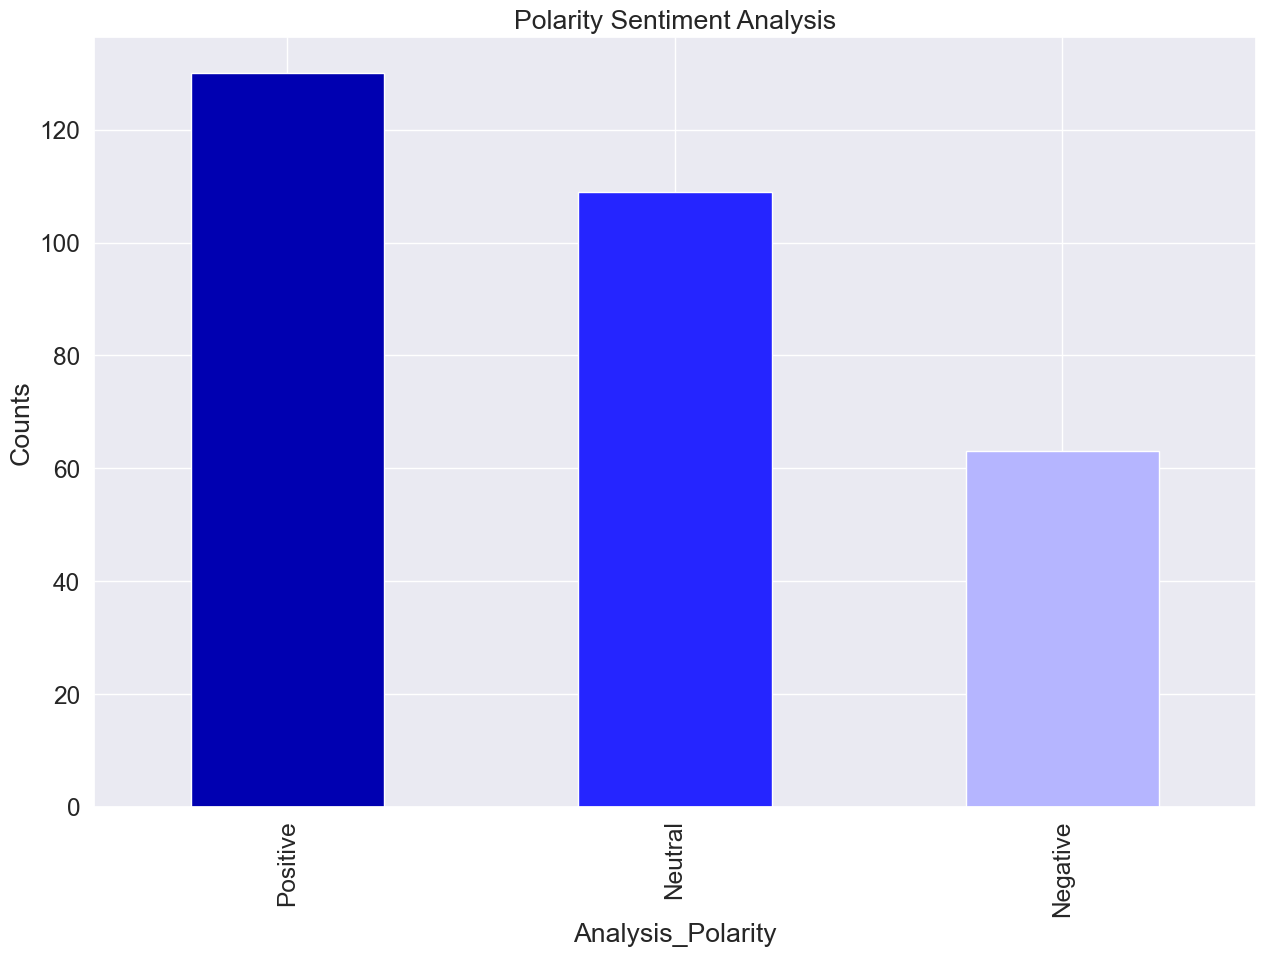

In [98]:

plt.figure(figsize=(15,10))

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar',  color=sns.palettes.mpl_palette('seismic'))
plt.show()

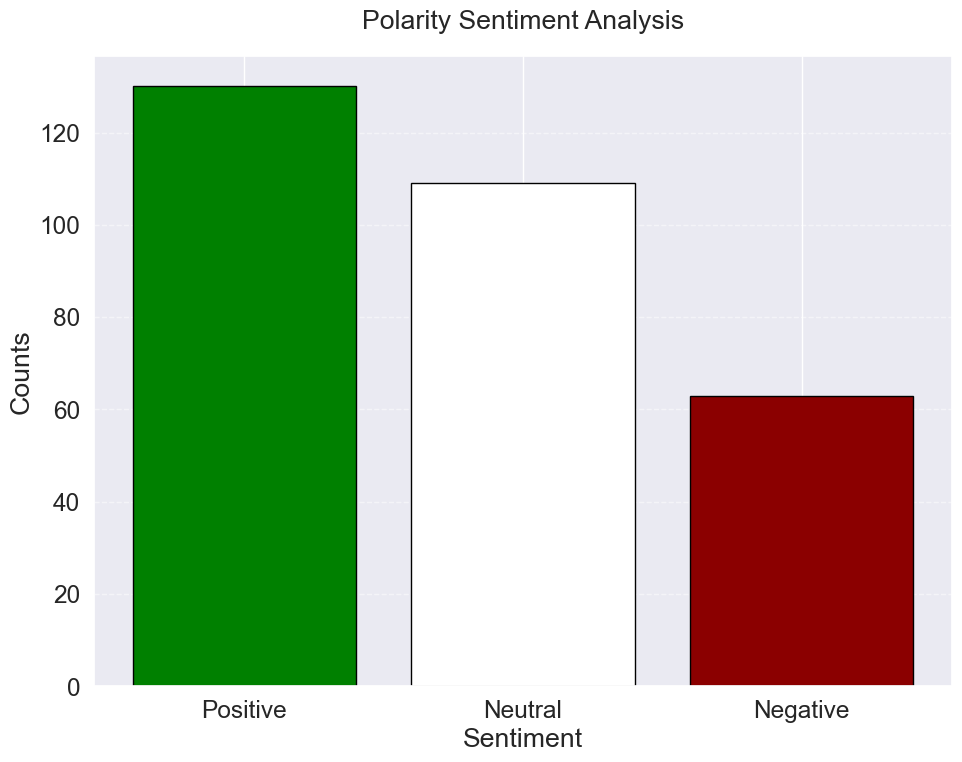

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define desired colors manually to match 'seismic' logic
custom_colors = {
    'Positive': 'green',
    'Neutral': 'white',
    'Negative': 'darkred'
    
    
}

# Get value counts in the correct order
counts = df['Analysis_Polarity'].value_counts()
labels = ['Positive', 'Neutral', 'Negative']  # Ensure fixed order
values = [counts.get(label, 0) for label in labels]
colors = [custom_colors[label] for label in labels]

# Plot
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, values, color=colors, edgecolor='black')

plt.title('Polarity Sentiment Analysis',pad=20)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot Subjectivity and Objective

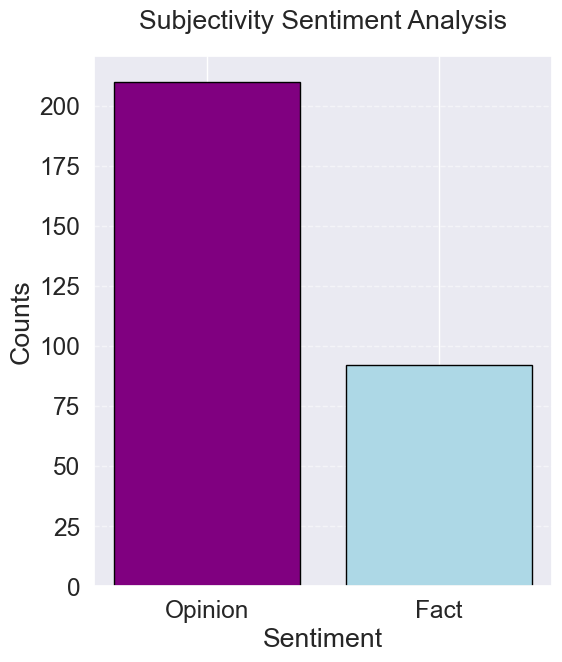

In [296]:
import matplotlib.pyplot as plt

# Define color mapping using hex strings
custom_colors = {
    'Opinion': 'purple',  # Dark red
    'Fact': 'lightblue'      # Light yellow
}

# Extract ordered values and their corresponding colors
counts = df['Analysis_Subjectivity'].value_counts()
labels = counts.index.tolist()
colors = [custom_colors[label] for label in labels]

# Plot bar chart with custom colors and borders
plt.figure(figsize=(6, 7))
plt.bar(labels, counts.values, color=colors, edgecolor='black')

plt.title('Subjectivity Sentiment Analysis',pad=20)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Perform Topic Labeling

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim
# import pickle
# import os

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# !pip install gensim

In [ ]:
# pyLDAvis.enable_notebook()

In [ ]:
# tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
#                                 stop_words = 'english',
#                                 lowercase = True,
#                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
#                                 max_df = 0.5,
#                                 min_df = 10)
# dtm_tf = tf_vectorizer.fit_transform(df['cleaned_comments'].values.astype('U'))
# print(dtm_tf.shape)

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
# dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_comments'].values.astype('U'))
# print(dtm_tfidf.shape)

In [ ]:
# # for TF DTM
# lda_tf = LatentDirichletAllocation(n_components =10, random_state=50)
# lda_tf.fit(dtm_tf)
# # for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_components =10, random_state=50)
# lda_tfidf.fit(dtm_tfidf)

In [ ]:
# import pyLDAvis.lda_model
# ...
# pyLDAvis.lda_model.prepare

In [ ]:
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# english_stopwords = stopwords.words('english')
# english_stopwords.extend(['from', 'subject', 're', 'edu', 'use'])

# def sentences_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuation.
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) if word not in english_stopwords] for doc in texts]

# comments = df.cleaned_comments.to_list()
# comment_words = list(sentences_to_words(comments))

# # Remove stop words.
# comment_words = remove_stopwords(comment_words)

In [ ]:
# import gensim.corpora as corpora

# # Create Dictionary.
# id2word = corpora.Dictionary(comment_words)

# # Create Corpus.
# texts = comment_words

# # Term Document Frequency.
# corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# from pprint import pprint

# # Number of topics.
# num_topics = 10

# # Build LDA model.
# lda_model = gensim.models.LdaMulticore(
#     corpus=corpus,
#     id2word=id2word,
#     num_topics=num_topics
# )

# # Print the Keyword in the 10 topics.
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim
# import pickle
# import os

# # Visualize the topics.
# pyLDAvis.enable_notebook()

# LDAvis_data_filepath = os.path.join(f'cleaned_comments_lda_{num_topics}.data')

# if os.path.exists(LDAvis_data_filepath):
#     # Load the pre-prepared pyLDAvis data from disk.
#     with open(LDAvis_data_filepath, 'rb') as f:
#         LDAvis_prepared = pickle.load(f)
# else:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)

# pyLDAvis.save_html(LDAvis_prepared, f'{LDAvis_data_filepath}.html')

In [ ]:
# LDAvis_prepared

In [ ]:
# topic_values = lda_tf.transform(dtm_tf)
# topic_values.shape

In [ ]:
df.head()

In [ ]:
# df_1=df.replace({0:' Insider Trading',1:'Stock Performance',2:'AI & Data Centers',3:'Price Targets',4:'Energy & Power Sector',5:'Defense Collaborations',6:'Stock Disclosures',7:'Chinese Market',8:'Company Acquisitions',9:'Financial Reports'})

In [ ]:
# df_1['topic'] = topic_values.argmax(axis=1)

In [ ]:
# df['Topic'] = topic_values.argmax(axis=1)

In [ ]:
# df_1.head()

In [ ]:
# df_1.columns

<Figure size 4000x2500 with 0 Axes>

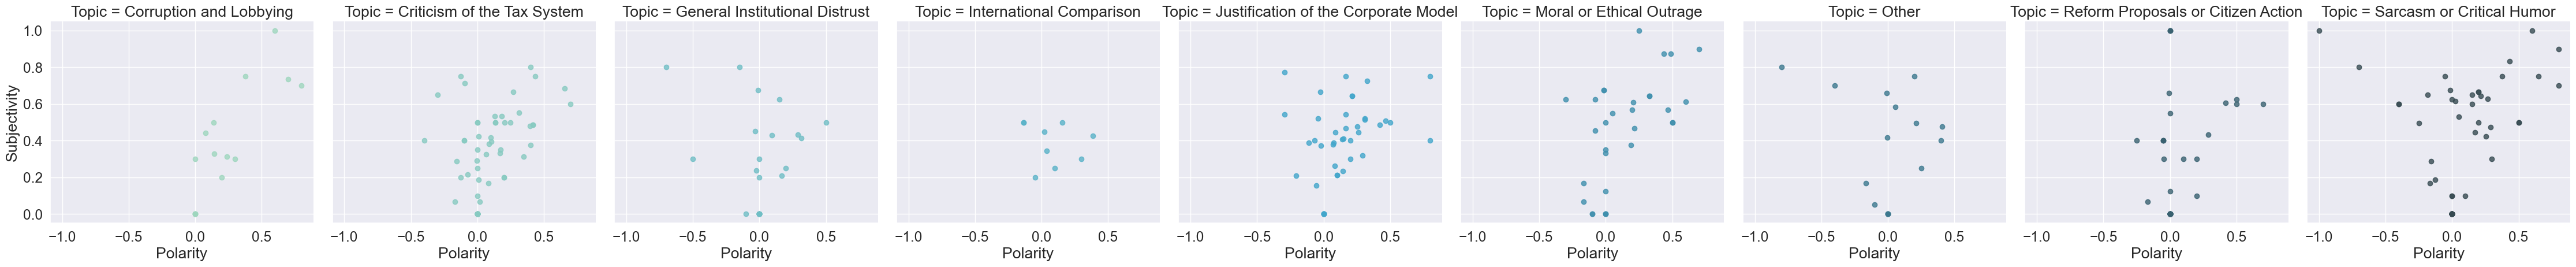

In [164]:
plt.figure(figsize=(40,25))

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)


plt.show()

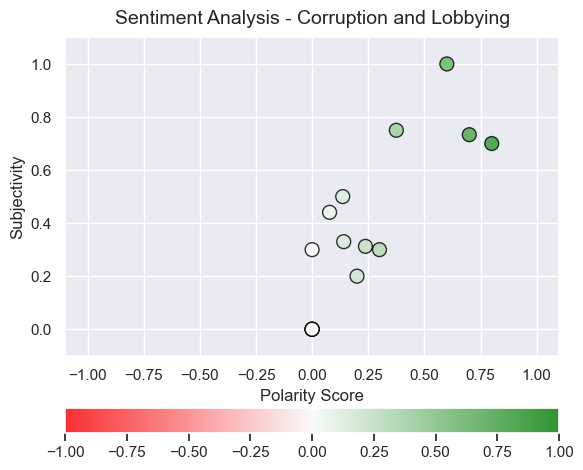

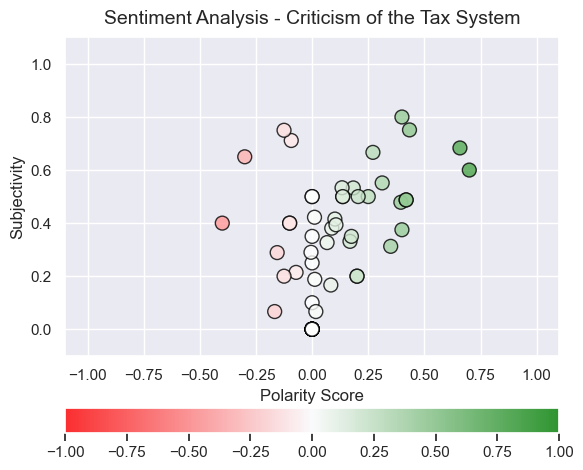

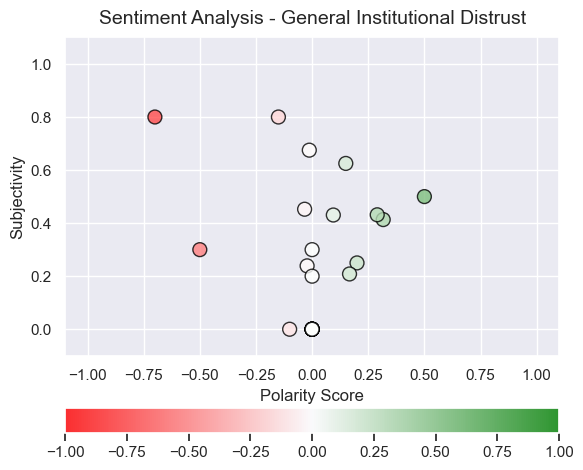

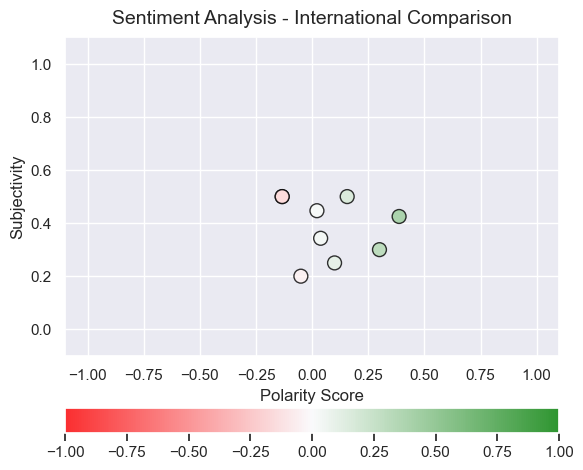

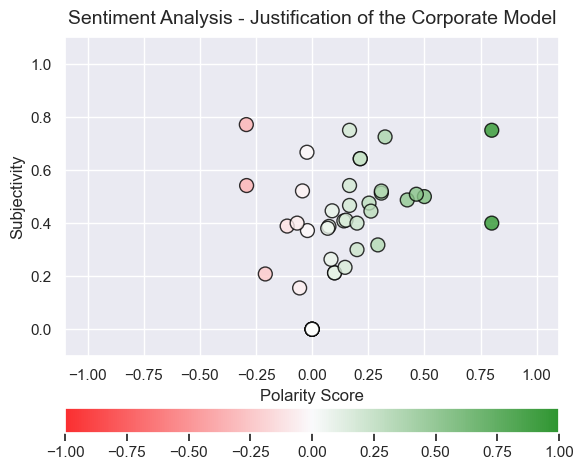

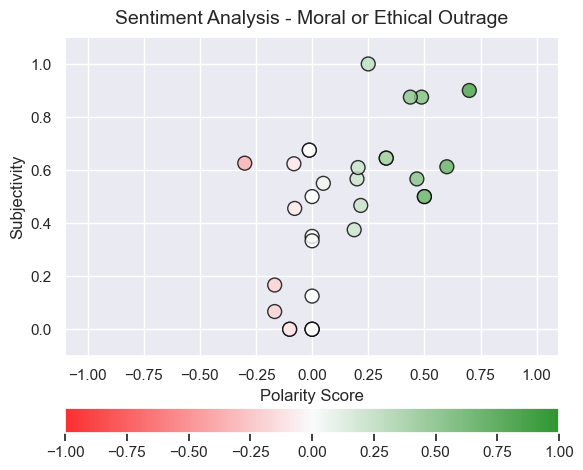

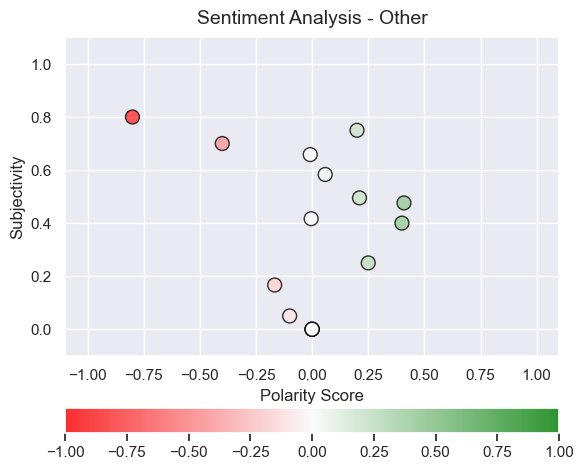

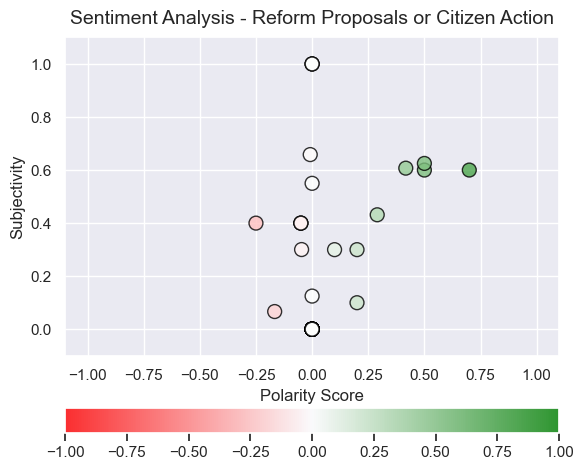

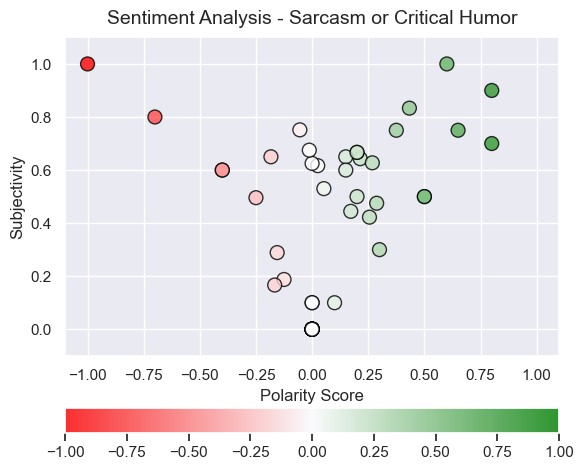

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Set font scale and style once
sns.set(font_scale=1)

# Loop over each unique topic
for topic in df['Topic'].unique():
    # Define custom colormap for polarity
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'RedWhiteGreen', ['red', 'white', 'green'], N=256
    )

    # Filter for current topic
    df_topic = df[df['Topic'] == topic]

    # Create the scatter plot
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(
        df_topic['Polarity'],
        df_topic['Subjectivity'],
        c=df_topic['Polarity'],      # <- color values
        s=100,
        cmap=cmap,                   # <- colormap
        vmin=-1, vmax=1,
        alpha=0.8,
        edgecolors='black'
    )

    # Add horizontal colorbar
    cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.12)

    # Add labels and formatting
    plt.xlabel('Polarity Score')
    plt.ylabel('Subjectivity')
    plt.xlim(-1.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.title(f'Sentiment Analysis - {topic}', fontsize=14, pad=10)
    plt.tight_layout()
    plt.show()



In [308]:
df_1 = df.copy()

In [310]:
df_2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df_2

Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
Corruption and Lobbying,NaN,5.0,10.0
Criticism of the Tax System,11.0,17.0,29.0
General Institutional Distrust,7.0,11.0,7.0
International Comparison,3.0,NaN,6.0
Justification of the Corporate Model,9.0,5.0,27.0
Moral or Ethical Outrage,9.0,7.0,15.0
Other,6.0,4.0,6.0
Reform Proposals or Citizen Action,7.0,43.0,8.0
Sarcasm or Critical Humor,11.0,17.0,22.0


In [312]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Corruption and Lobbying to Sarcasm or Critical Humor
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negative  8 non-null      float64
 1   Neutral   8 non-null      float64
 2   Positive  9 non-null      float64
dtypes: float64(3)
memory usage: 288.0+ bytes


In [314]:
df_2['Total'] = df_2.sum(axis=1)

In [316]:
df_2.columns

Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [318]:
for i in df_2:
    df_2[i] = round(df_2[i]*100/df_2.Total)

df_2

Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
Corruption and Lobbying,NaN,33.0,67.0,100.0
Criticism of the Tax System,19.0,30.0,51.0,100.0
General Institutional Distrust,28.0,44.0,28.0,100.0
International Comparison,33.0,NaN,67.0,100.0
Justification of the Corporate Model,22.0,12.0,66.0,100.0
Moral or Ethical Outrage,29.0,23.0,48.0,100.0
Other,38.0,25.0,38.0,100.0
Reform Proposals or Citizen Action,12.0,74.0,14.0,100.0
Sarcasm or Critical Humor,22.0,34.0,44.0,100.0


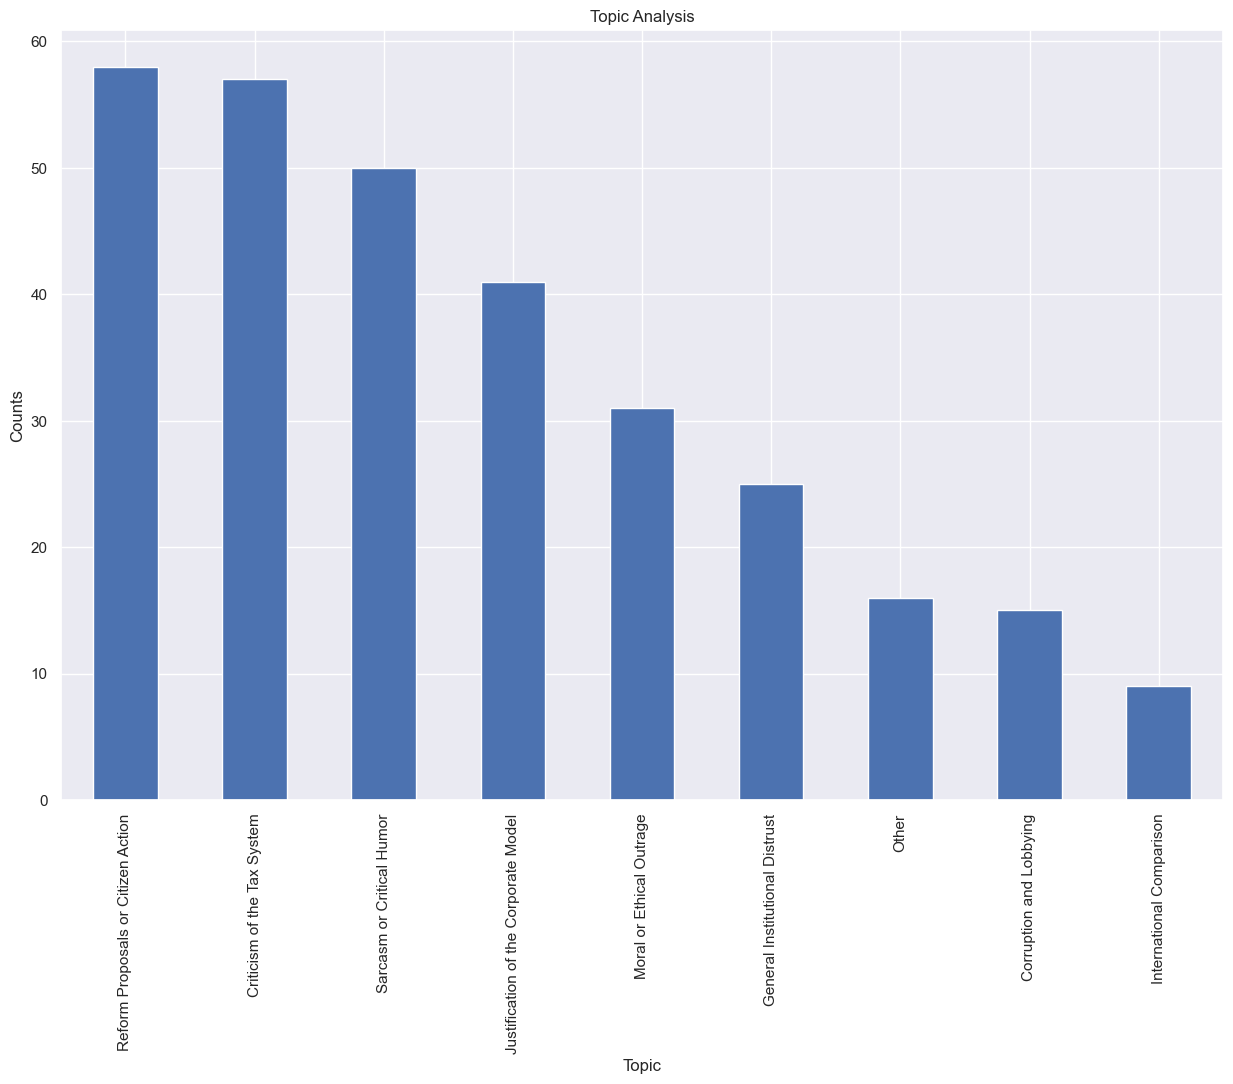

In [320]:
# Plot and visualizing the counts for each topic
plt.figure(figsize=(15,10))

plt.title('Topic Analysis')
plt.xlabel('Topic')
plt.ylabel('Counts')
df_1['Topic'].value_counts().plot(kind = 'bar')
plt.show()

In [322]:
df_2=df_2.fillna(0)

In [324]:
df_2['Total'] = df_2.sum(axis=1)
df_2 = df_2.drop(['Total'], axis=1)

In [326]:
print(df_2.shape)

(9, 3)


In [328]:
print(df_2.head())

Analysis_Polarity                     Negative  Neutral  Positive
Topic                                                            
Corruption and Lobbying                    0.0     33.0      67.0
Criticism of the Tax System               19.0     30.0      51.0
General Institutional Distrust            28.0     44.0      28.0
International Comparison                  33.0      0.0      67.0
Justification of the Corporate Model      22.0     12.0      66.0


In [330]:
print(df_2.tail())

Analysis_Polarity                     Negative  Neutral  Positive
Topic                                                            
Justification of the Corporate Model      22.0     12.0      66.0
Moral or Ethical Outrage                  29.0     23.0      48.0
Other                                     38.0     25.0      38.0
Reform Proposals or Citizen Action        12.0     74.0      14.0
Sarcasm or Critical Humor                 22.0     34.0      44.0


# Perform Topic Labeling

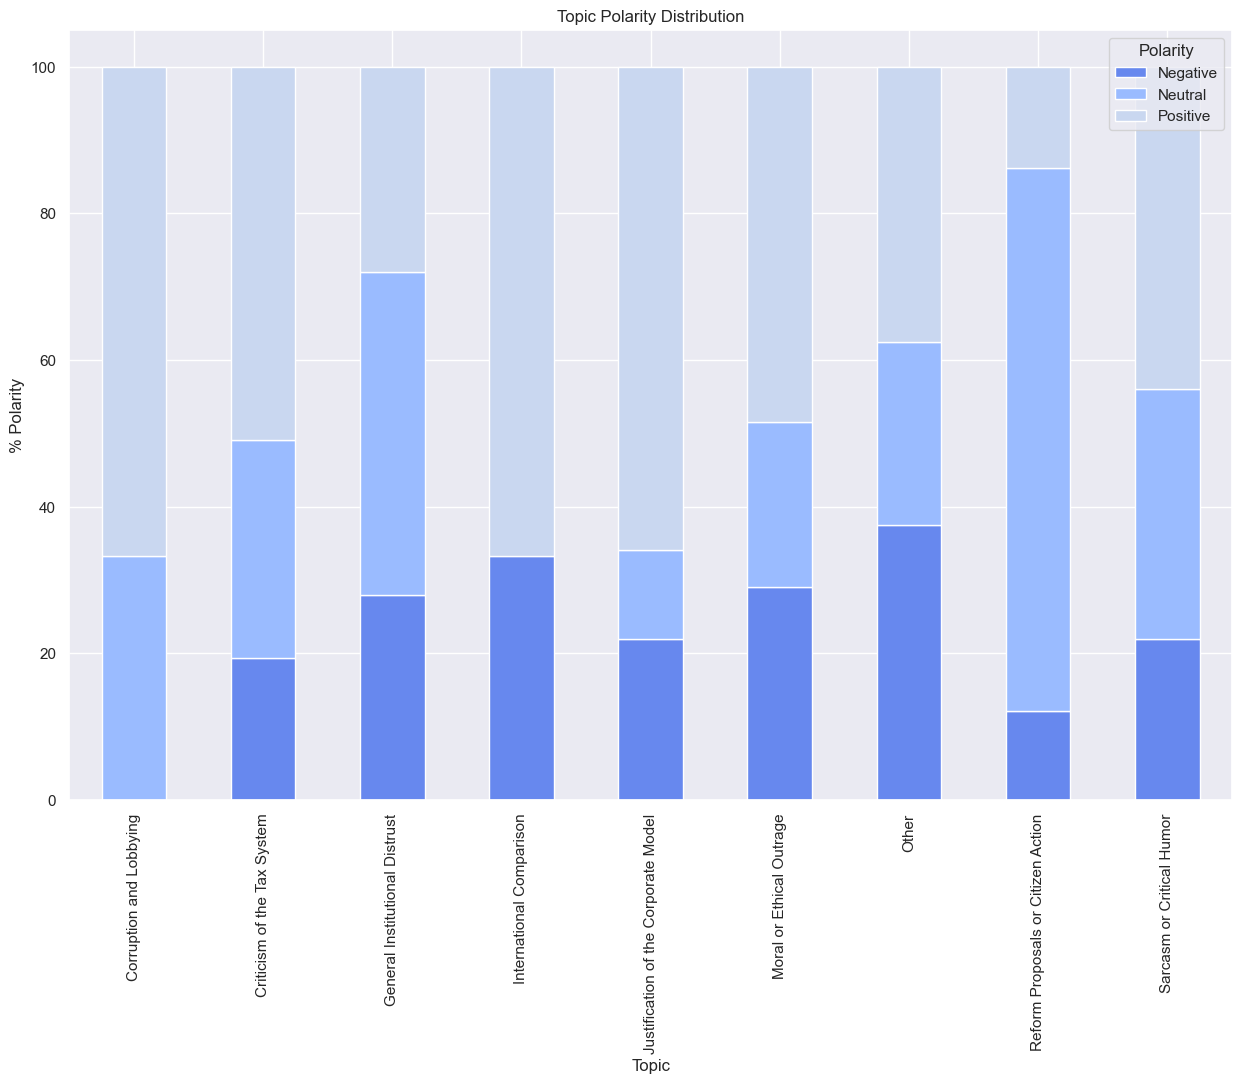

In [333]:
# Create a new dataframe with topic names and polarity percentages
df_topic_polarity = df_1.groupby('Topic')['Analysis_Polarity'].value_counts().unstack(fill_value=0).apply(lambda x: x / x.sum() * 100, axis=1)

# Create the stacked bar plot
ax = df_topic_polarity.plot(kind='bar',color=sns.palettes.mpl_palette('coolwarm'), stacked=True, figsize=(15, 10))

# Add labels and title
ax.set_xlabel('Topic')
ax.set_ylabel('% Polarity')
ax.set_title('Topic Polarity Distribution')

# Add topic names to the x-axis
ax.set_xticklabels(df_topic_polarity.index, rotation=90)

# Add legend
ax.legend(title='Polarity')

# Show the plot
plt.show()


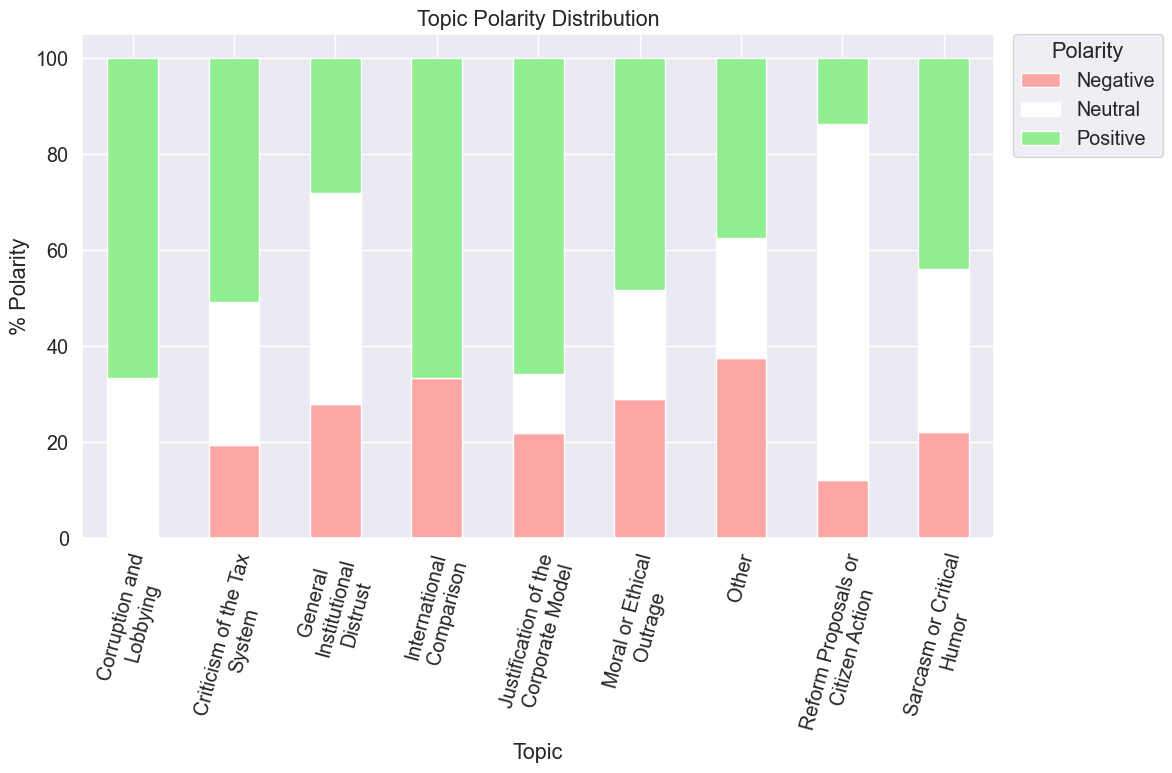

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Prepare data
df_topic_polarity = df_1.groupby('Topic')['Analysis_Polarity'].value_counts().unstack(fill_value=0)
df_topic_polarity = df_topic_polarity.apply(lambda x: x / x.sum() * 100, axis=1)

# Sort column order
df_topic_polarity = df_topic_polarity[['Negative', 'Neutral', 'Positive']]

# Define custom colors
color_map = {
    'Negative': '#fca5a5',   # Light red
    'Neutral': 'white',
    'Positive': 'lightgreen'
}

sns.set(font_scale=1.3)

# Wrap long topic names to max 20 characters per line
wrapped_labels = ['\n'.join(textwrap.wrap(label, 20)) for label in df_topic_polarity.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
df_topic_polarity.plot(
    kind='bar',
    color=[color_map[col] for col in df_topic_polarity.columns],
    stacked=True,
    edgecolor='white',
    ax=ax
)

# Labels and title
ax.set_xlabel('Topic')
ax.set_ylabel('% Polarity')
ax.set_title('Topic Polarity Distribution')

# Apply wrapped labels
ax.set_xticklabels(wrapped_labels, rotation=75, ha='center')

# Move legend outside the plot
ax.legend(title='Polarity', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Layout adjustment
plt.tight_layout()
plt.savefig("polarity_dist.png", dpi=300, bbox_inches='tight')
plt.show()


# Perform correlation analysis for the topics identified

In [375]:
df['Topic'].unique()

array(['Corruption and Lobbying', 'Criticism of the Tax System',
       'General Institutional Distrust', 'International Comparison',
       'Justification of the Corporate Model', 'Moral or Ethical Outrage',
       'Other', 'Reform Proposals or Citizen Action',
       'Sarcasm or Critical Humor'], dtype=object)

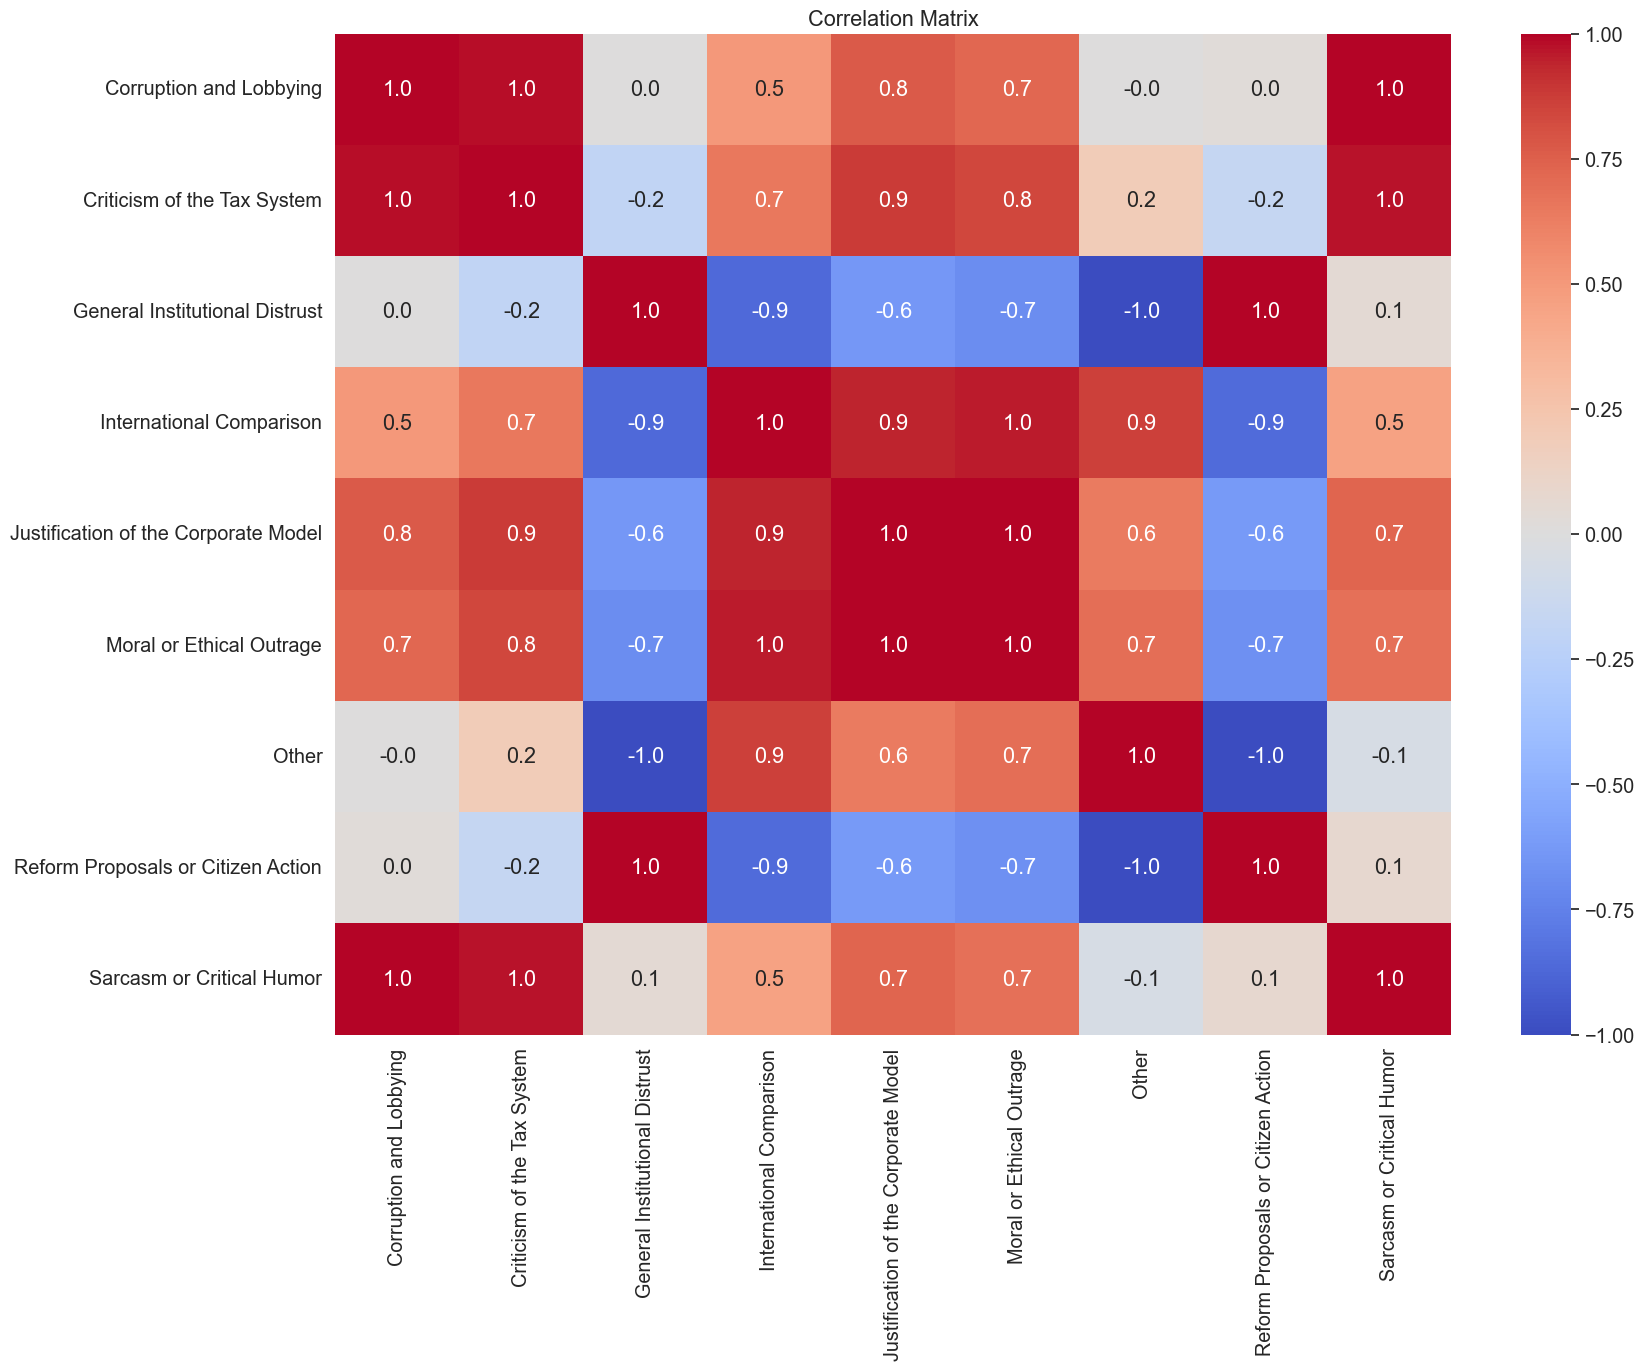

In [377]:
# Define the data
topic_names = [
    'Corruption and Lobbying',
    'Criticism of the Tax System',
    'General Institutional Distrust',
    'International Comparison',
    'Justification of the Corporate Model',
    'Moral or Ethical Outrage',
    'Other',
    'Reform Proposals or Citizen Action',
    'Sarcasm or Critical Humor'
    ]

# Get the topic-polarity matrix
topic_polarity_matrix = df_topic_polarity.values

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(topic_polarity_matrix)
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f", xticklabels=topic_names, yticklabels=topic_names)
plt.title("Correlation Matrix")
plt.show()

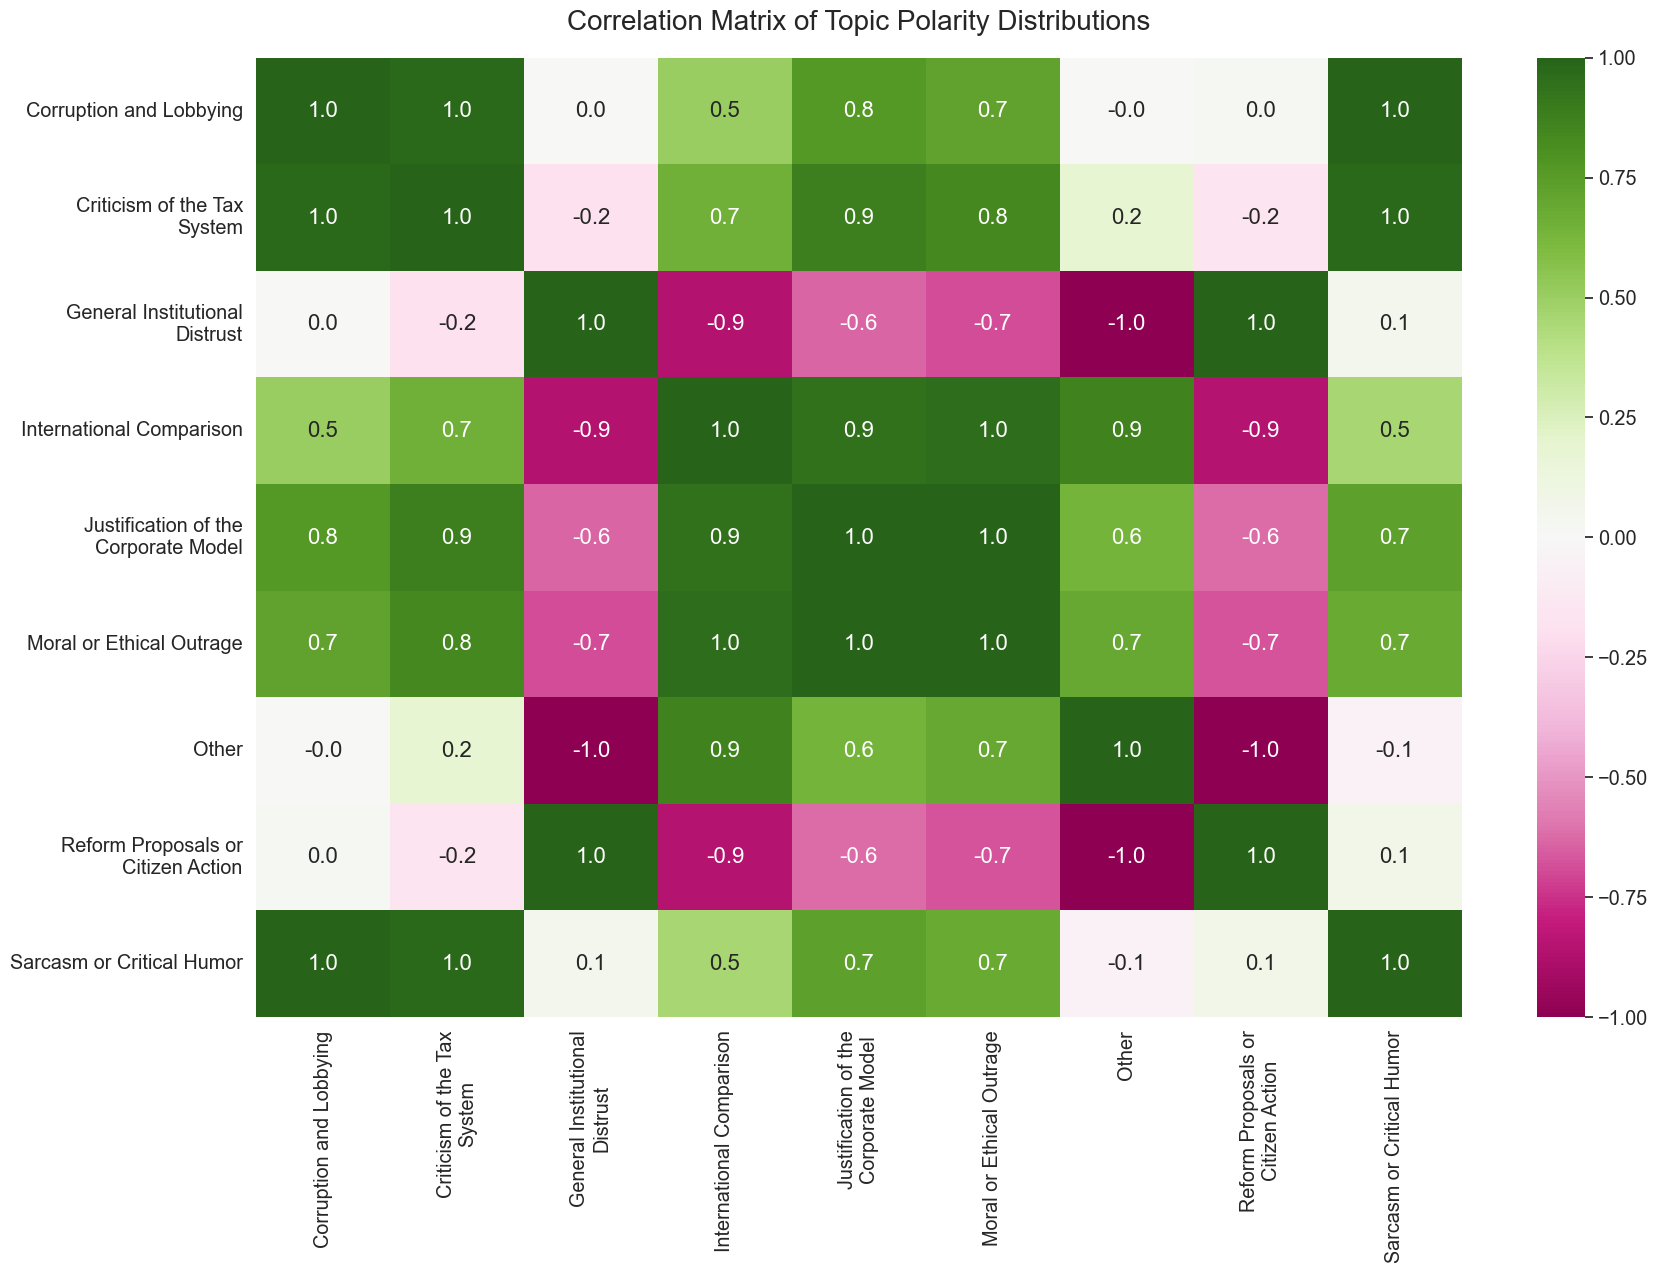

In [397]:
# Define the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

# Define the data
topic_names = [
    'Corruption and Lobbying',
    'Criticism of the Tax System',
    'General Institutional Distrust',
    'International Comparison',
    'Justification of the Corporate Model',
    'Moral or Ethical Outrage',
    'Other',
    'Reform Proposals or Citizen Action',
    'Sarcasm or Critical Humor'
]

# Optional: wrap long labels to max 25 characters per line
wrapped_labels = ['\n'.join(textwrap.wrap(label, 25)) for label in topic_names]

# Get the topic-polarity matrix
topic_polarity_matrix = df_topic_polarity.values

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(topic_polarity_matrix)

# Plot
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="PiYG",  # Alternative to "coolwarm"
    fmt=".1f",
    xticklabels=wrapped_labels,
    yticklabels=wrapped_labels,
    annot_kws={"size": 16}
)

plt.title("Correlation Matrix of Topic Polarity Distributions", fontsize=20, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


# Plot dendongram chart for the topic identified

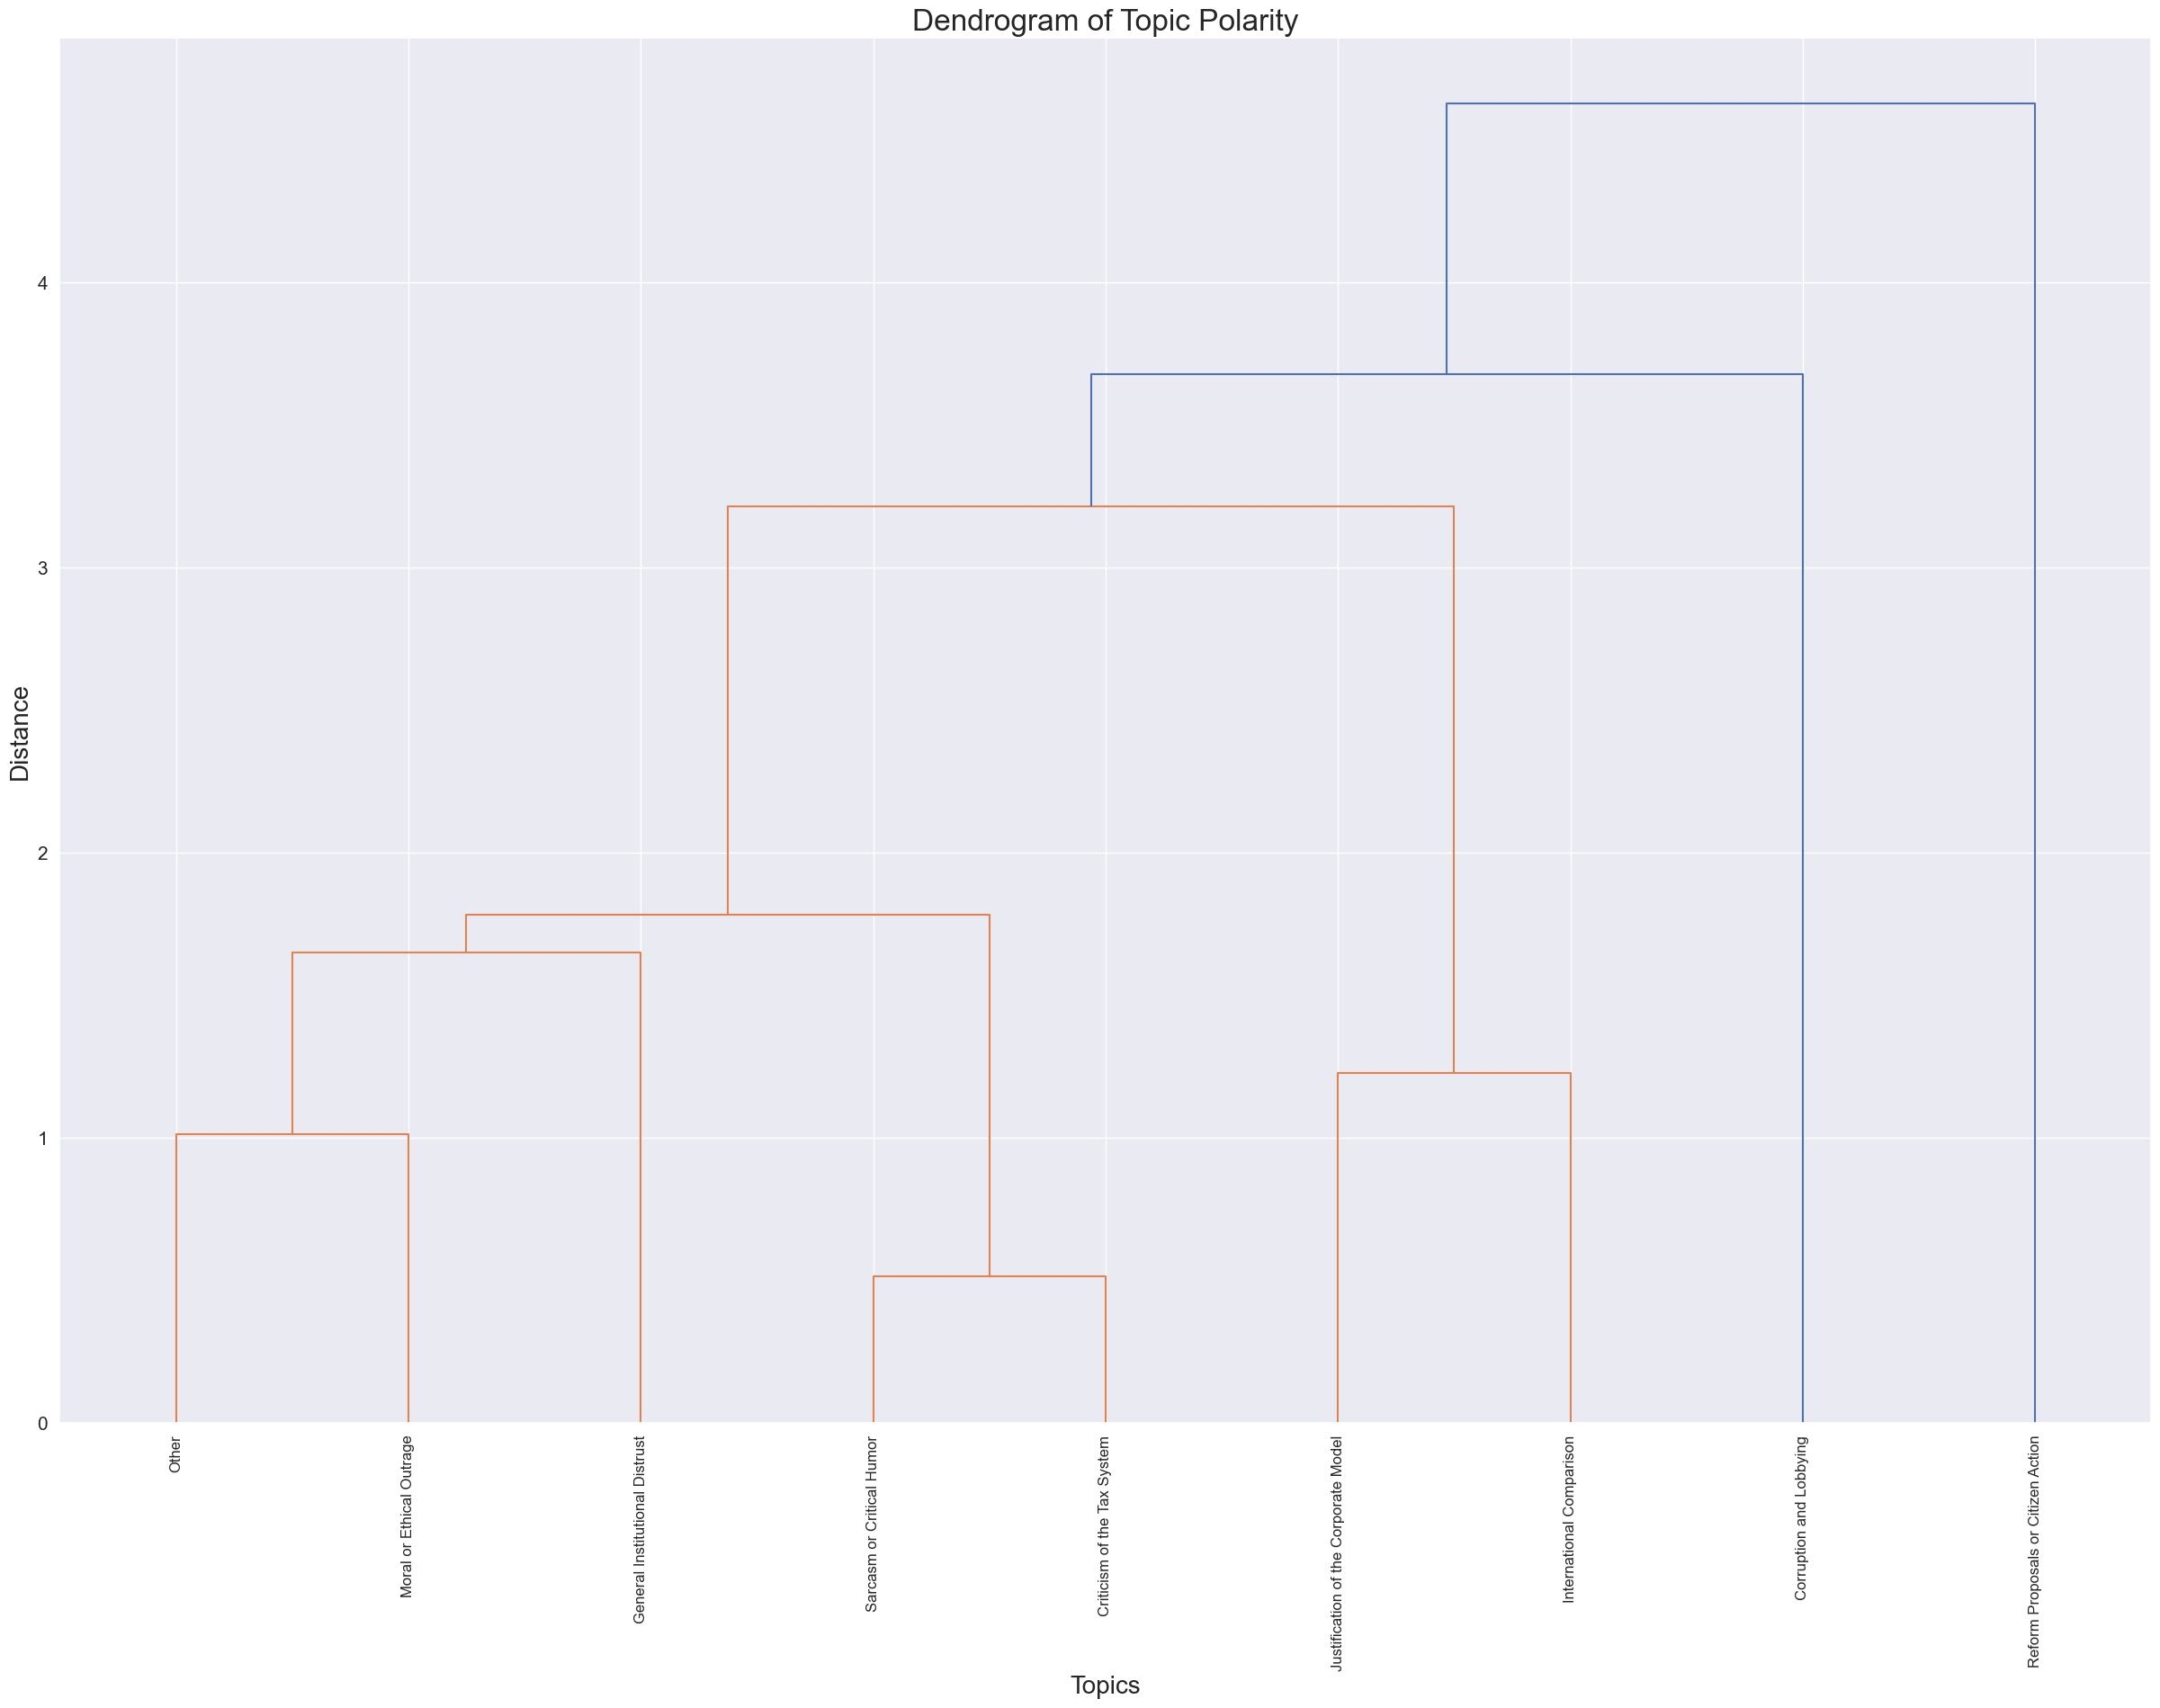

In [399]:

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Standardize the topic-polarity matrix
scaler = StandardScaler()
scaled_topic_polarity_matrix = scaler.fit_transform(topic_polarity_matrix)

# Calculate the linkage
linkage_matrix = sch.linkage(scaled_topic_polarity_matrix, method='ward')

# Create the dendrogram
plt.figure(figsize=(30, 20))
sch.dendrogram(linkage_matrix, orientation='top', distance_sort='descending', labels=topic_names)
plt.title('Dendrogram of Topic Polarity', size=24)
plt.xlabel('Topics', size=20)
plt.ylabel('Distance', size=20)
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

# Anayze the degree of centrality and betweeness

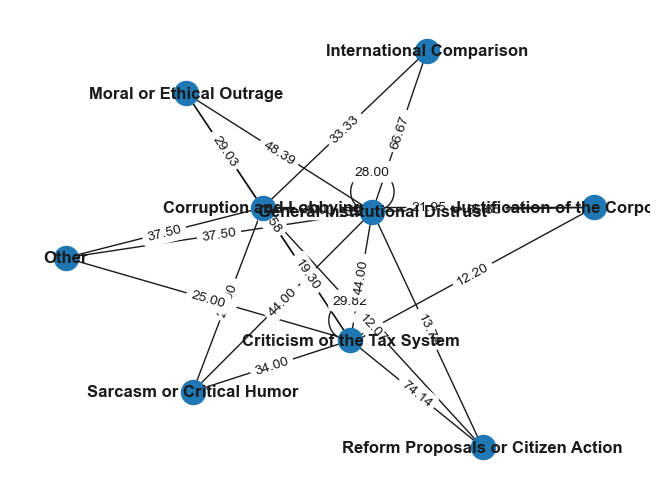

In [402]:
# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(topic_names)

# Add edges to the graph based on the polarity matrix
for i in range(len(topic_polarity_matrix)):
    for j in range(len(topic_polarity_matrix[0])):
        if topic_polarity_matrix[i][j] > 0.5:
            G.add_edge(topic_names[i], topic_names[j], weight=topic_polarity_matrix[i][j])

# Set the layout of the nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_weight='bold')

# Set the edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


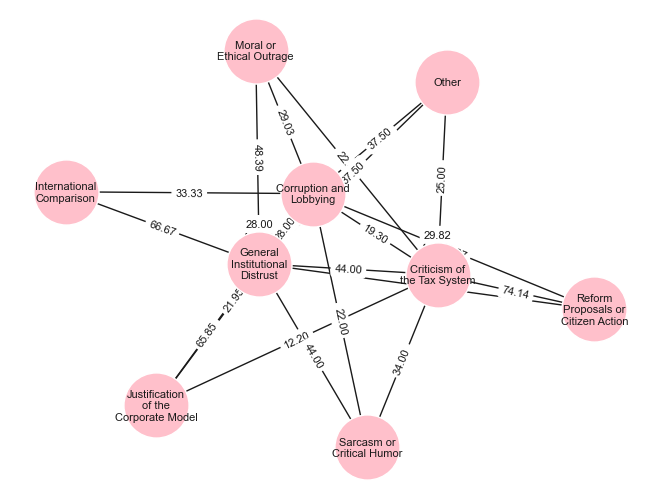

In [430]:
import networkx as nx
import matplotlib.pyplot as plt
import textwrap

# Wrap long topic names
wrapped_topic_names = ['\n'.join(textwrap.wrap(name, 15)) for name in topic_names]
name_map = dict(zip(topic_names, wrapped_topic_names))

# Create a graph
G = nx.Graph()

# Add wrapped nodes
G.add_nodes_from(wrapped_topic_names)

# Add edges with wrapped names
for i in range(len(topic_polarity_matrix)):
    for j in range(len(topic_polarity_matrix[0])):
        if topic_polarity_matrix[i][j] > 0.5:
            G.add_edge(name_map[topic_names[i]], name_map[topic_names[j]],
                       weight=topic_polarity_matrix[i][j])

# Set the layout
pos = nx.spring_layout(G)

# Draw the graph with smaller font size for labels
nx.draw(
    G,
    pos,
    with_labels=True,
    font_size=8,               # <-- reduced font size here
    #font_weight='bold',
    node_color='pink',
    node_size=2200,
    edgecolors='w'
)

# Add edge labels
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.savefig("network.png", dpi=300, bbox_inches='tight')
plt.show()



# Check for the degree of centrality and betweenness for the topics identified

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print the results
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"{node}: {centrality}")

# Perform Classification

In [ ]:
df['Topic'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Topic'] = label_encoder.fit_transform(df['Topic'])

In [ ]:
df['Topic'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'Analysis_Polarity' is your target variable and other relevant features are in X
X = df[['Polarity', 'Subjectivity', 'Topic']]  # Example features, replace with your actual features
y = df['Analysis_Polarity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier()))


# Evaluate models
results = []
names = []
for name, model in models:
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {name}, Accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        results.append(accuracy)
        names.append(name)
    except Exception as e:  # Handle potential errors during model training/prediction
        print(f"Error with model {name}: {e}")
        results.append(0)
        names.append(name)


In [ ]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'],
            annot_kws={"size": 13})
plt.title("Confusion Matrix DTC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()